## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [476]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [503]:
Data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv', sep = ',')
Data.iloc[np.r_[0:6, -5:0]]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
5,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,male : married/widowed,none,...,unknown / no property,48,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [506]:
Data.info()
print("Категориальные признаки: credit_history, purpose, other_debtors, property, housing, "
      "job, personal_status_sex, other_installment_plans",
     "Бинарные признаки: telephone, foreign_worker, credit_risk",
     "Порядковые признаки (все, что с интервалами и знаками меньше/больше): status, employment_duration, present_residence, number_credits"
      " savings, installment_rate, people_liable(хоть и два варианта, но не true-false)", 
     "Количественные признаки:  duration, amount,  age", '\n', "Пропусков нет.",
      sep='\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [508]:
print(Data.groupby("purpose")['amount'].apply(lambda x: x.mean()))
print("Вывод: больше всего денег в среднем берут на развитие бизнесса и на покупку новой машины.")

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64
Вывод: больше всего денег в среднем берут на развитие бизнесса и на покупку новой машины.


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [509]:
#сделана кодировка столбца housing, а затем всё возвращено к прежнему виду
#Data['housing'].value_counts() #посмотрела значения в столбце, чтобы закодировать их в след. строках
our_housing = Data.housing.copy()
code_housing = {'rent':0, 'for free':1, 'own':2}
Data.housing = Data.housing.replace(code_housing)
print("Процент клиентов моложе 30 лет, которые снимают жилье:",
      Data['status'][Data['housing']==0][Data['age']<30].count()/Data['housing'][Data['age']>30].count() *100, 
      "Процент клиентов старше 40 лет, которые снимают жилье:",
      Data['status'][Data['housing']==0][Data['age']>40].count()/Data['housing'][Data['age']>40].count() *100, sep = '\n')
Data.housing = our_housing
#Data.housing.value_counts()

Процент клиентов моложе 30 лет, которые снимают жилье:
41.62436548223351
Процент клиентов старше 40 лет, которые снимают жилье:
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [510]:
#можно через замену на столбец int сделать,но так мы изменим исходную таблицу (либо придется старый столбец запоминать и потом снова делать замену, потому решение
#через replace закоментировано и выбрано более короткое (и на мой взгляд, более оптимальное в нашем случае))

##Data['number_credits'].value_counts() #посмотрела, какие значения в столбцах в рамках незакоментированного решения

Data['status'][Data['number_credits']=='4-5'][Data['foreign_worker']=='yes'].count()+Data['status'][Data['number_credits']=='>= 6'][Data['foreign_worker']=='yes'].count()


#Другое решение с кодировкой столбца
#n_credits = {'1':1,'2-3':2.5, '4-5':4.5, '>= 6':7.0}
#our_ncredits = Data.number_credits.copy() 
#Data.number_credits = Data.number_credits.replace(n_credits)
#print(Data['status'][Data['number_credits']>3][Data['foreign_worker']=='yes'].count())
#Data.number_credits = our_ncredits
##Data.housing.value_counts()


1

### Задание 6 (1 балл)

In [511]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

Text(0, 0.5, 'y')

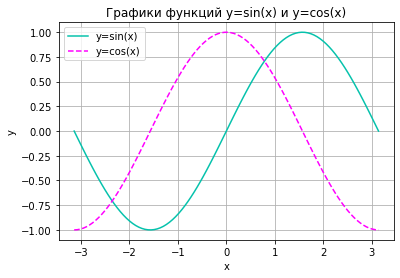

In [512]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = [np.sin(i) for i in x]
y2 = [np.cos(i) for i in x]
plt.plot(x, y1, color="xkcd:turquoise")
plt.plot(x, y2, "r--", color="magenta")
plt.grid()      # включение отображения сетки
plt.legend(["y=sin(x)", "y=cos(x)"])
plt.title("Графики функций y=sin(x) и y=cos(x)")
plt.xlabel('x')
plt.ylabel('y')

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

На гистограмме слева показано, как много людей в зависимости от их статуса имеют хороший credit_risk, а справа - плохой. Как видим, во всех статусах число людей с хорошим credit_risk преобладает, только в категории '...<0 DM' число людей справа и слева сравнимо. Предположение: смотреть на процентное соотношение, так как в некоторых барах слева в несколько раз больше людей, чем справа, в других же нет.


<Figure size 432x288 with 0 Axes>

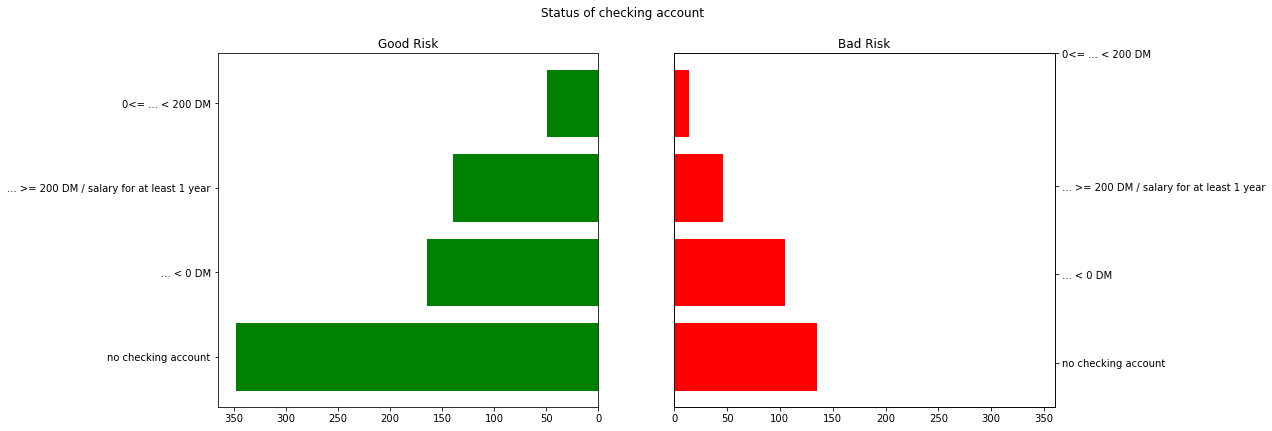

In [513]:
names = list(pd.unique(Data.status))
x=Data['status'][Data['credit_risk']=='bad'].value_counts()
y=Data['status'][Data['credit_risk']=='good'].value_counts()
valuess = list(y)
values = list(x)
y_pos=(0.5, 1.5, 2.5, 4)

fig = plt.figure()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[1].barh(names, values, align='center', color='red')
ax1 = axes[1].barh(names, values, align='center', color='red')
ax0 = axes[0].barh(names, valuess, align='center', color='green')
ax0 = axes[0].invert_xaxis() #меняю направление оси х на противоположное для первого графика
ax0 = axes[1].set_yticks([]) #прячу ось у
ax1 = axes[1].twinx()
ax1.set_ylim(ax1.get_ylim())
ax1.set_yticks(y_pos)
ax1.set_yticklabels(pd.unique(Data.status))
fig.suptitle('Status of checking account')
fig.set_size_inches(15, 6.5)
axes[0].set_title('Good Risk')
axes[1].set_title('Bad Risk')

ax1 = axes[1].set_xlim([0, 360])
ax0 = axes[1].set_xlim([0, 360])

print("На гистограмме слева показано, как много людей в зависимости от их статуса имеют хороший credit_risk, а справа - плохой.",
     "Как видим, во всех статусах число людей с хорошим credit_risk преобладает, только в категории '...<0 DM' число людей справа и слева "
     "сравнимо. Предположение: смотреть на процентное соотношение, так как в некоторых барах слева в несколько раз больше людей, чем справа,"
     " в других же нет.")

### Задание 8  (0.5 балла)

In [485]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Способ построения гистограммы с помощью seaborn значительно проще с точки зрения трудоемкости написания кода, с точки зрения восприятия информации, первый способ интереснее, но удобнее воспринимать информацию с гистограммы, созданной вторым способом.


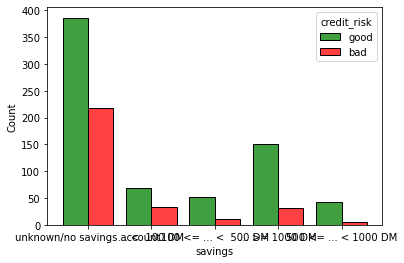

In [514]:
colors = ["green", "red"]
sns.set_palette(sns.color_palette(colors))
sns.histplot(data=Data, x="savings", hue="credit_risk", multiple="dodge", shrink=.8)
plt.rcParams['figure.figsize']=(13,6)
print("Способ построения гистограммы с помощью seaborn значительно проще с точки зрения трудоемкости написания кода,"
     " с точки зрения восприятия информации, первый способ интереснее, но удобнее воспринимать информацию с гистограммы,"
     " созданной вторым способом.")

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

На данном графике учтено сразу три признака - возраст, сбережения и кредит-риск.


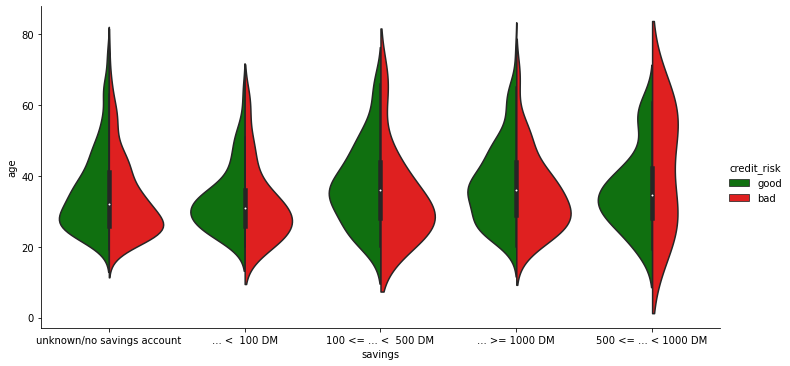

In [515]:
sns.catplot(data=Data, x="savings", y="age", hue="credit_risk",  kind='violin', split=True, aspect=2)
print("На данном графике учтено сразу три признака - возраст, сбережения и кредит-риск.")

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Людей с хорошим кредит-риском больше, чем с плохим. Большая часть клиентов - люди в возрасте от 20 до 40 лет. Пик людей с плохим кредит-риском приходится на группу людей в возрасте 30 лет, в то время как с хорошим кредит-риском - на группу людей в возрасте 40 лет. 
Технически функция displot воссоздала сразу два графика друг под другом, ранжировав по признаку credit_risk. Ниже к ним был добавлен график с общим числом клиентов, разделенных по возрасту.


<Figure size 1080x432 with 0 Axes>

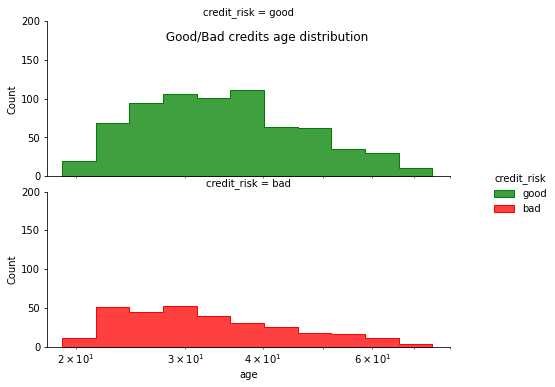

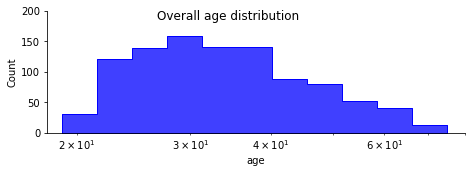

In [516]:
colors = ["green", "red"]
sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize=(15,6))

g = sns.displot(data=Data, x="age", hue="credit_risk", row="credit_risk", log_scale=True, element="step", fill=True, bins=11)
g.fig.suptitle('\n Good/Bad credits age distribution')
g.fig.set_figwidth(8)
g.fig.set_figheight(5)
g.set(xlim=(18, 80), ylim=(0, 200))

h = sns.displot(x="age", data=Data, log_scale=True, element="step", fill=True, color='blue', bins=11)
h.fig.set_figwidth(7)
h.fig.set_figheight(2)
h.set(xlim=(18, 80), ylim=(0, 200))
h.fig.suptitle('Overall age distribution')

print("Людей с хорошим кредит-риском больше, чем с плохим. Большая часть клиентов - люди в возрасте от 20 до 40 лет."
      " Пик людей с плохим кредит-риском приходится на группу людей в возрасте 30 лет, в то время как с хорошим кредит-риском - на группу"
      " людей в возрасте 40 лет."
     " \nТехнически функция displot воссоздала сразу два графика друг под другом, ранжировав по признаку credit_risk. Ниже к ним был добавлен"
     " график с общим числом клиентов, разделенных по возрасту.")

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Выводы: больше всего случаев сосредоточено в нижней левой четверти графика, то есть большая часть клиентов - люди, берущие крудиты в размере не более 10000 и не более, чем на (чуть поднимем границу) 50 лет. Наибольшее скопление - до 5000 на срок до 25 лет.



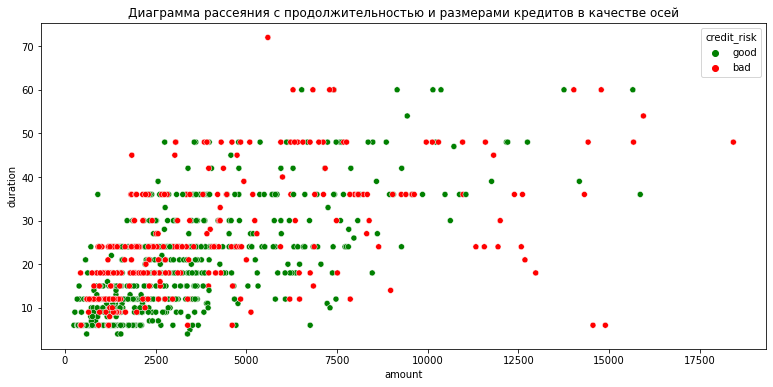

In [517]:
sns.scatterplot(data=Data, x="amount", y="duration", hue="credit_risk")
plt.rcParams['figure.figsize']=(15,7)
plt.title("Диаграмма рассеяния с продолжительностью и размерами кредитов в качестве осей")

print("Выводы: больше всего случаев сосредоточено в нижней левой четверти графика, то есть большая часть клиентов - "
     "люди, берущие крудиты в размере не более 10000 и не более, чем на (чуть поднимем границу) 50 лет. Наибольшее скопление - "
     "до 5000 на срок до 25 лет.\n")


### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

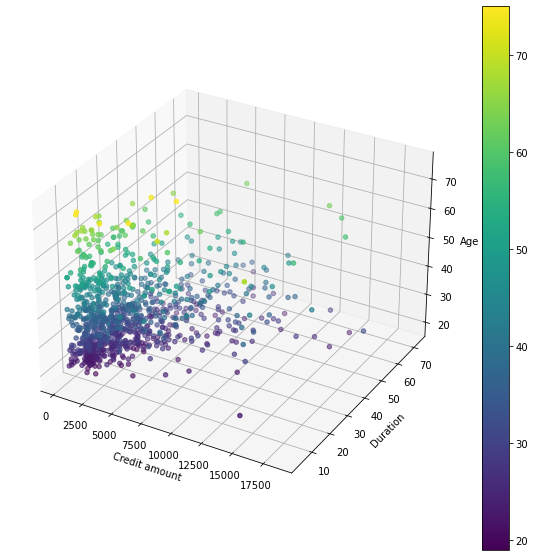

Выводы: дублируют прошлые. Наибольшее число клиентов приходится на людей от 20 до 50, берущих кредит на срок до 50 лет и суммой до 5000. На мой взгляд, проще делать выводы по 2д-диаграмме, так как в 3д на двумерном экране можно перепутать положение точки.


In [518]:
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
n = 1000
xs = Data.amount
ys = Data.duration
zs = Data.age
scat = ax.scatter(xs, ys, zs, c=zs)
plt.colorbar(scat)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.show()
print("Выводы: дублируют прошлые. Наибольшее число клиентов приходится на людей от 20 до 50, берущих кредит на срок до 50 лет и суммой до "
     "5000. На мой взгляд, проще делать выводы по 2д-диаграмме, так как в 3д на двумерном экране можно перепутать положение точки.")


### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [519]:
Data = Data.drop(columns = ['purpose'])
Data = Data.drop(columns = ['other_debtors'])
Data = Data.drop(columns = ['property'])
Data = Data.drop(columns = ['housing'])
Data = Data.drop(columns = ['job'])
Data = Data.drop(columns = ['personal_status_sex'])
Data = Data.drop(columns = ['other_installment_plans'])
Data = Data.drop(columns = ['credit_history'])


#pd.get_dummies(Data['credit_history'])
Data['no_account_st'] = Data.apply(lambda row: 1 if row.status == 'no checking account' else 0, axis=1)
Data['lzero_st'] = Data.apply(lambda row: 1 if row.status == '... < 0 DM' else 0, axis=1)
Data['gzeroltw_st'] = Data.apply(lambda row: 1 if row.status == '0<= ... < 200 DM' else 0, axis=1)
Data['gtw_st'] = Data.apply(lambda row: 1 if row.status == '... >= 200 DM / salary for at least 1 year' else 0, axis=1)
Data = Data.drop(columns = ['status'])

Data['no_empl'] = Data.apply(lambda row: 1 if row.employment_duration == 'unemployed' else 0, axis=1)
Data['lone_empl'] = Data.apply(lambda row: 1 if row.employment_duration == '< 1 yr' else 0, axis=1)
Data['gone_empl'] = Data.apply(lambda row: 1 if row.employment_duration == '1 <= ... < 4 yrs' else 0, axis=1)
Data['gfour_empl'] = Data.apply(lambda row: 1 if row.employment_duration == '4 <= ... < 7 yrs' else 0, axis=1)
Data['gseven_empl'] = Data.apply(lambda row: 1 if row.employment_duration == '>= 7 yrs' else 0, axis=1)
Data = Data.drop(columns = ['employment_duration'])

Data['lone_res'] = Data.apply(lambda row: 1 if row.present_residence == '< 1 yr' else 0, axis=1)
Data['gone_res'] = Data.apply(lambda row: 1 if row.present_residence == '1 <= ... < 4 yrs' else 0, axis=1)
Data['gfour_res'] = Data.apply(lambda row: 1 if row.present_residence == '4 <= ... < 7 yrs' else 0, axis=1)
Data['gseven_res'] = Data.apply(lambda row: 1 if row.present_residence == '>= 7 yrs' else 0, axis=1)
Data = Data.drop(columns = ['present_residence'])

Data['1_cr'] = Data.apply(lambda row: 1 if row.number_credits == '1' else 0, axis=1)
Data['23_cr'] = Data.apply(lambda row: 1 if row.number_credits == '2-3' else 0, axis=1)
Data['45_cr'] = Data.apply(lambda row: 1 if row.number_credits == '4-5' else 0, axis=1)
Data['g5_cr'] = Data.apply(lambda row: 1 if row.number_credits == '>=6' else 0, axis=1)
Data = Data.drop(columns = ['number_credits'])

Data['l20_inst_r'] = Data.apply(lambda row: 1 if row.installment_rate == '< 20' else 0, axis=1)
Data['ge20_inst_r'] = Data.apply(lambda row: 1 if row.installment_rate == '20 <= ... < 25' else 0, axis=1)
Data['ge25_inst_r'] = Data.apply(lambda row: 1 if row.installment_rate == '25 <= ... < 35' else 0, axis=1)
Data['ge35_inst_r'] = Data.apply(lambda row: 1 if row.installment_rate == '>= 35' else 0, axis=1)
Data = Data.drop(columns = ['installment_rate'])

Data['no_sav'] = Data.apply(lambda row: 1 if row.savings == 'unknown/no savings account' else 0, axis=1)
Data['l100_sav'] = Data.apply(lambda row: 1 if row.savings == '... <  100 DM' else 0, axis=1)
Data['ge100_sav'] = Data.apply(lambda row: 1 if row.savings == '100 <= ... <  500 DM' else 0, axis=1)
Data['ge500_sav'] = Data.apply(lambda row: 1 if row.savings == '500 <= ... < 1000 DM' else 0, axis=1)
Data['ge1000_sav'] = Data.apply(lambda row: 1 if row.savings == '... >= 1000 DM' else 0, axis=1)
Data = Data.drop(columns = ['savings'])

Data['litt_pliab'] = Data.apply(lambda row: 1 if row.people_liable == '0 to 2' else 0, axis=1)
Data['big_pliab'] = Data.apply(lambda row: 1 if row.people_liable == '3 or more' else 0, axis=1)
Data = Data.drop(columns = ['people_liable'])


#с бинарными аналогично
Data['tel'] = Data.apply(lambda row: 0 if row.telephone == 'no' else 1, axis=1)
Data = Data.drop(columns = ['telephone'])

Data['for_wor'] = Data.apply(lambda row: 1 if row.foreign_worker == 'yes' else 0, axis=1)
Data = Data.drop(columns = ['foreign_worker'])

Data['risk'] = Data.apply(lambda row: 1 if row.credit_risk == 'bad' else 0, axis=1)
Data = Data.drop(columns = ['credit_risk'])

Data

,duration,amount,age,no_account_st,lzero_st,gzeroltw_st,gtw_st,no_empl,lone_empl,gone_empl,...,no_sav,l100_sav,ge100_sav,ge500_sav,ge1000_sav,litt_pliab,big_pliab,tel,for_wor,risk
0,18,1049,21,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,9,2799,36,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,12,841,23,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,12,2122,39,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,12,2171,38,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
996,24,2303,45,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
997,21,12680,30,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,1
998,12,6468,52,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [17]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))